## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
# imports
import pandas as pd
from google.colab import files
import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
upload = files.upload()

Saving house-votes-84.data to house-votes-84.data


In [11]:
#read in the files
col_heads = ['Party', 'Handicapped-infants', 
               'Water-project-cost-sharing', 'Adoption-of-the-budget-resolution', 
               'Physician-fee-freeze', 'El-Salvador-aid', 
               'Religious-groups-in-schools', 'Anti-satellite-test-ban', 
               'Aid-to-nicaraguan-contras', 'MX-missile', 'Immigration', 
               'Synfuels-corporation-cutback', 'Education-spending', 
               'Superfund-right-to-sue', 'Crime', 'Duty-free-exports', 
               'Axport-administration-act-South-Africa']

df = pd.read_csv('house-votes-84.data', header=None, names=col_heads, na_values='?')
df.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Axport-administration-act-South-Africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [14]:
#convert n and y to 0 and 1
df = df.replace({'y':1, 'n':0})
df.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Axport-administration-act-South-Africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [15]:
# make two data frames, one for each party
rep = df[df['Party']=='republican']
rep.head(2)

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Axport-administration-act-South-Africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [16]:
dem = df[df['Party']=='democrat']
dem.head(2)

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Axport-administration-act-South-Africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


###Generate and numerically represent a confidence interval

In [0]:
# first define the confidence_interval function
def confidence_interval(data, confidence=0.95):
  """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  # drop the null values
  data = data[~np.isnan(data)]
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1+confidence)/2.0, n-1)
  return (mean, mean - moe, mean + moe)

In [25]:
# test the confidence interval for the Immagration voting for democrats
confidence_interval(dem['Immigration'])
#  mean                lower bound           upper bound

(0.4714828897338403, 0.41075744059137587, 0.5322083388763047)

In [26]:
# try testing the confidence interval for the El Salvador aid voting for republicans
confidence_interval(rep['El-Salvador-aid'])
#  mean                lower bound           upper bound

(0.9515151515151515, 0.9183979451371699, 0.9846323578931332)

###Graphically (with a plot) represent the confidence interval

In [0]:
import seaborn as sns

In [0]:
# define a function to do a temporary removal of NaN values
#   so that the functions can work properly.
def remove_nan(data):
  data = np.array(data)
  data= data[~np.isnan(data)]
  return data

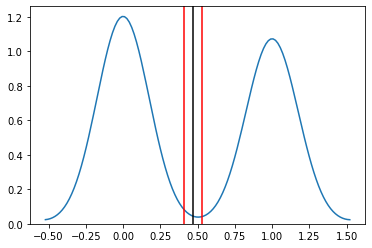

In [43]:
# graph the confidence interval
data = remove_nan(dem['Immigration'])

sns.kdeplot(data);
CI = confidence_interval(data)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

1.0    157
0.0      8
Name: El-Salvador-aid, dtype: int64


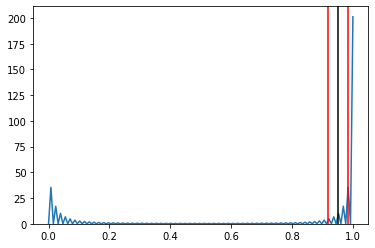

In [55]:
# graph the second example
data = remove_nan(rep['El-Salvador-aid'])

print(rep['El-Salvador-aid'].value_counts())

sns.kdeplot(data);
CI = confidence_interval(data)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

###Interpret the confidence interval - what does it tell you about the data and its distribution?

For the first example (democratic support of Immigration) This confidence interval does not disprove the null theory that exactly half of the democrats voted in favor of the Immigration bill.

On the second example (republican support of the El Salvador aid), this confidence interval has disproved the null theory that exatly half of republicans voted in favor of the El Salvador Aid bill.

###Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data

In [61]:
upload = files.upload()

Saving flag.data to flag.data


In [89]:
col_heads = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
             'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 
             'gold', 'white', 'black', 'orange', 'mainhue', 'circles',  
             'crosses',  'saltires', 'quarters', 'sunstars', 'crescent', 
             'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

flag = pd.read_csv('flag.data', header=None, names=col_heads, index_col=0)
flag.head()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [90]:
# pull only the catagorical data I want to use
flag = flag[['landmass', 'zone', 'language', 'religion', 'mainhue']]
flag.head()

,landmass,zone,language,religion,mainhue
name,,,,,
Afghanistan,5,1,10,2,green
Albania,3,1,6,6,red
Algeria,4,1,8,2,green
American-Samoa,6,3,1,1,blue
Andorra,3,1,6,0,gold


In [0]:
# make it more readable
flag_r = flag
flag_r['landmass'] = flag_r['landmass'].replace({1:'N.America', 2:'S.America', 
                                                 3: 'Europe', 4:'Africa', 
                                                 5:'Asia', 6:'Oceania'})
flag_r['zone'] = flag_r['zone'].replace({1:'NE', 2:'SE', 3:'SW', 4:'NW'})
flag_r['language'] = flag_r['language'].replace({1:'English',2:'Spanish',
                                                 3:'French',4:'German',
                                                 5:'Slavic',
                                                 6:'Other Indo-European',
                                                 7:'Chinese',8:'Arabic',
                                                 9:'Japanese/Turkish/Finnish/Magyar',
                                                 10:'Others'})
flag_r['religion'] = flag_r['religion'].replace({0:'Catholic',1:'Other_Christian',
                                                 2:'Muslim',3:'Buddhist',4:'Hindu',
                                                 5:'Ethnic',6:'Marxist',7:'Marxist'})

In [92]:
flag_r.describe(exclude='number')

,landmass,zone,language,religion,mainhue
count,194,194,194,194,194
unique,6,4,10,7,8
top,Africa,NE,Others,Other_Christian,red
freq,52,91,46,60,71


In [94]:
flag_r.sample(5)

,landmass,zone,language,religion,mainhue
name,,,,,
Mozambique,Africa,SE,Others,Ethnic,gold
Jamaica,N.America,NW,English,Other_Christian,green
Congo,Africa,SE,Others,Ethnic,red
Algeria,Africa,NE,Arabic,Muslim,green
Botswana,Africa,SE,Others,Ethnic,blue


In [98]:
#check out the values for the mainhue and landmass
print(flag_r['mainhue'].value_counts())
print()
print(flag_r['landmass'].value_counts())

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64

Africa       52
Asia         39
Europe       35
N.America    31
Oceania      20
S.America    17
Name: landmass, dtype: int64


In [116]:
contingency_table = pd.crosstab(flag_r['landmass'], flag_r['mainhue'], margins=True) 
# can add ",margins=True" to get an "All" column and row at bottom and left
contingency_table

mainhue,black,blue,brown,gold,green,orange,red,white,All
landmass,,,,,,,,,
Africa,1,6,0,9,17,2,16,1,52
Asia,1,2,2,2,6,2,20,4,39
Europe,1,3,0,4,0,0,17,10,35
N.America,1,15,0,1,5,0,4,5,31
Oceania,1,11,0,1,1,0,6,0,20
S.America,0,3,0,2,2,0,8,2,17
All,5,40,2,19,31,4,71,22,194


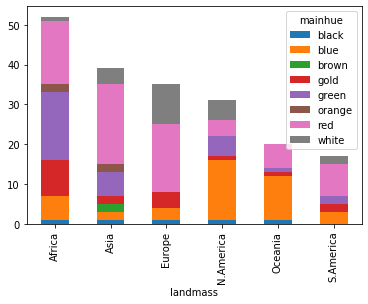

In [115]:
contingency_table.plot(kind='bar', stacked=True);

####By hand using Numpy

In [117]:
# Calculate the expected value
row_sums = contingency_table.iloc[0:6,8].values
col_sums = contingency_table.iloc[6,0:8].values

print(row_sums)
print(col_sums)

[52 39 35 31 20 17]
[ 5 40  2 19 31  4 71 22]


In [118]:
total = contingency_table.loc['All','All']
total

194

In [120]:
flag_r.shape[0]

194

In [121]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(6, 8)
[[ 1.34020619 10.72164948  0.53608247  5.09278351  8.30927835  1.07216495
  19.03092784  5.89690722]
 [ 1.00515464  8.04123711  0.40206186  3.81958763  6.23195876  0.80412371
  14.27319588  4.42268041]
 [ 0.90206186  7.21649485  0.36082474  3.42783505  5.59278351  0.72164948
  12.80927835  3.96907216]
 [ 0.79896907  6.39175258  0.31958763  3.03608247  4.95360825  0.63917526
  11.34536082  3.51546392]
 [ 0.51546392  4.12371134  0.20618557  1.95876289  3.19587629  0.41237113
   7.31958763  2.26804124]
 [ 0.43814433  3.50515464  0.17525773  1.66494845  2.71649485  0.35051546
   6.22164948  1.92783505]]


In [122]:
observed = pd.crosstab(flag_r['landmass'], flag_r['mainhue']).values
print(observed.shape)
observed

(6, 8)


array([[ 1,  6,  0,  9, 17,  2, 16,  1],
       [ 1,  2,  2,  2,  6,  2, 20,  4],
       [ 1,  3,  0,  4,  0,  0, 17, 10],
       [ 1, 15,  0,  1,  5,  0,  4,  5],
       [ 1, 11,  0,  1,  1,  0,  6,  0],
       [ 0,  3,  0,  2,  2,  0,  8,  2]])

In [129]:
# find the Chi-Squared with numpy

chi_squared =((observed - expected)**2/(expected)).sum()
print("Chi-squared:", chi_squared)

Chi-squared: 93.98226961130858


In [130]:
# now the degrees of freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 35


####In a single line using Scipy

In [132]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 93.98226961130858
P-value: 2.682102954738348e-07
Degrees of Freedom: 35
Expected: 
 [[ 1.34020619 10.72164948  0.53608247  5.09278351  8.30927835  1.07216495
  19.03092784  5.89690722]
 [ 1.00515464  8.04123711  0.40206186  3.81958763  6.23195876  0.80412371
  14.27319588  4.42268041]
 [ 0.90206186  7.21649485  0.36082474  3.42783505  5.59278351  0.72164948
  12.80927835  3.96907216]
 [ 0.79896907  6.39175258  0.31958763  3.03608247  4.95360825  0.63917526
  11.34536082  3.51546392]
 [ 0.51546392  4.12371134  0.20618557  1.95876289  3.19587629  0.41237113
   7.31958763  2.26804124]
 [ 0.43814433  3.50515464  0.17525773  1.66494845  2.71649485  0.35051546
   6.22164948  1.92783505]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

###Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
#define a confidence interval function
def confidence_interval(data, confidence=0.95):
  """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  # drop the null values
  data = data[~np.isnan(data)]
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1+confidence)/2.0, n-1)
  return (mean, mean - moe, mean + moe)

In [0]:
# make the remove NaN function
def remove_nan(data):
  data = np.array(data)
  data= data[~np.isnan(data)]
  return data

In [0]:
def graph_CI(data):
  # set confidence interval
  CI = confidence_interval(data)
  # remove NaNs
  data= remove_nan(data)

  #graph
  sns.kdeplot(data);
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[2], color='red')
  plt.axvline(x=CI[0], color='k');

  print(f"The median is {CI[0]}\n the lowerbound is {CI[1]}\n and the upperbound is {CI[2]}")

The median is 0.5966981132075472
 the lowerbound is 0.5498151808536169
 and the upperbound is 0.6435810455614774


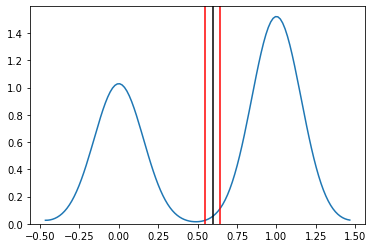

In [147]:
graph_CI(df['Adoption-of-the-budget-resolution'])

In [141]:
# re-import flag data to test this with.
col_heads = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
             'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 
             'gold', 'white', 'black', 'orange', 'mainhue', 'circles',  
             'crosses',  'saltires', 'quarters', 'sunstars', 'crescent', 
             'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

flag = pd.read_csv('flag.data', header=None, names=col_heads, index_col=0)
flag.head()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


The median is 700.0463917525773
 the lowerbound is 392.6317906566958
 and the upperbound is 1007.4609928484588


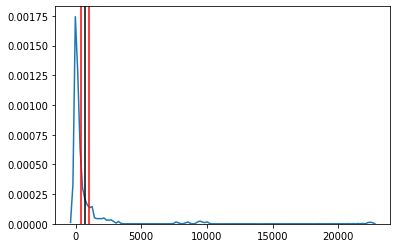

In [150]:
#graphs the confidence Interval in one line
graph_CI(flag['area'])

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)